# Q2 Main Notebook

In [6]:
# Import relevant libralies

import torch
import matplotlib.pyplot as plt
import math
import tqdm

# Determine the device
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
    )
print(f"The calculation was done using {device}")

The calculation was done using cuda


0it [00:00, ?it/s]

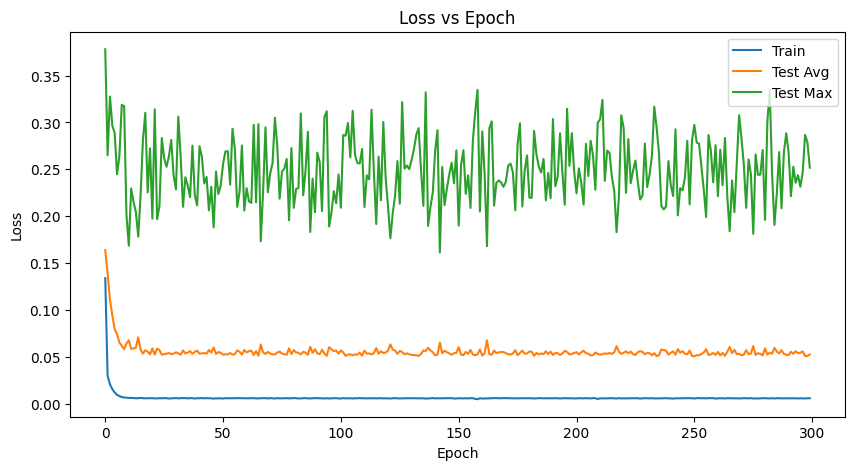

1it [01:06, 66.23s/it]

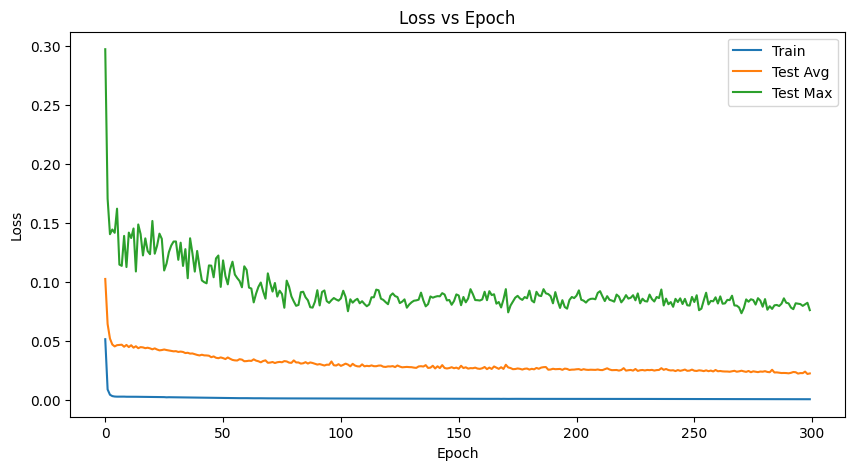

2it [02:11, 65.79s/it]

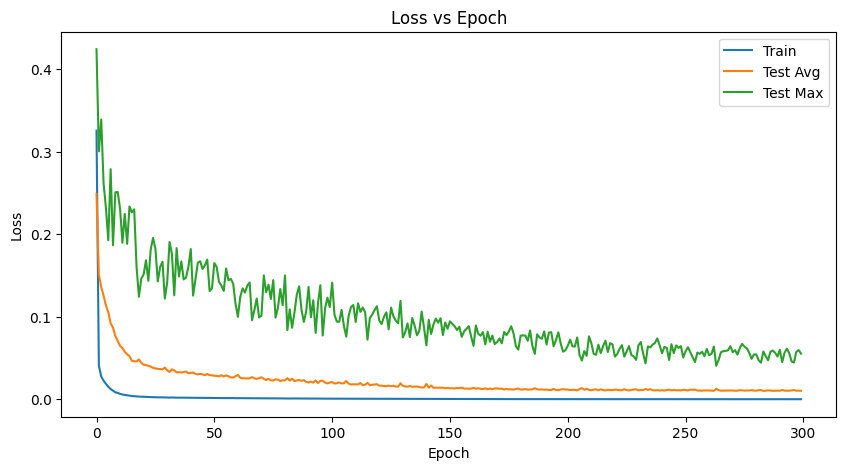

3it [03:18, 66.19s/it]

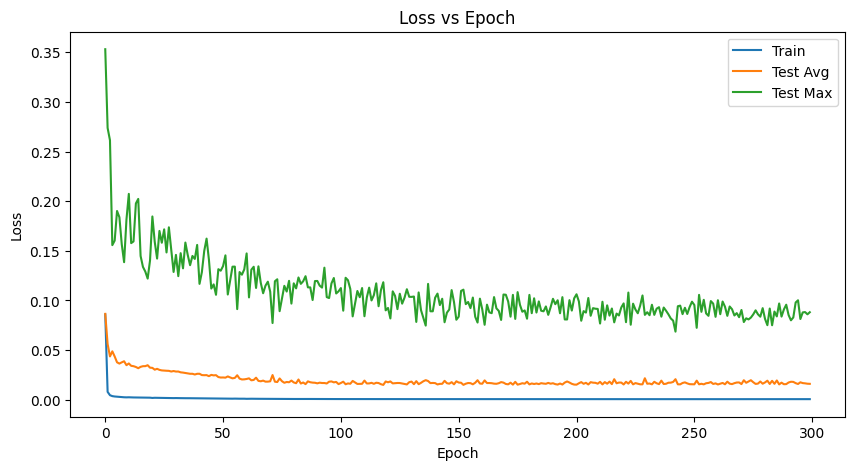

4it [04:24, 66.12s/it]

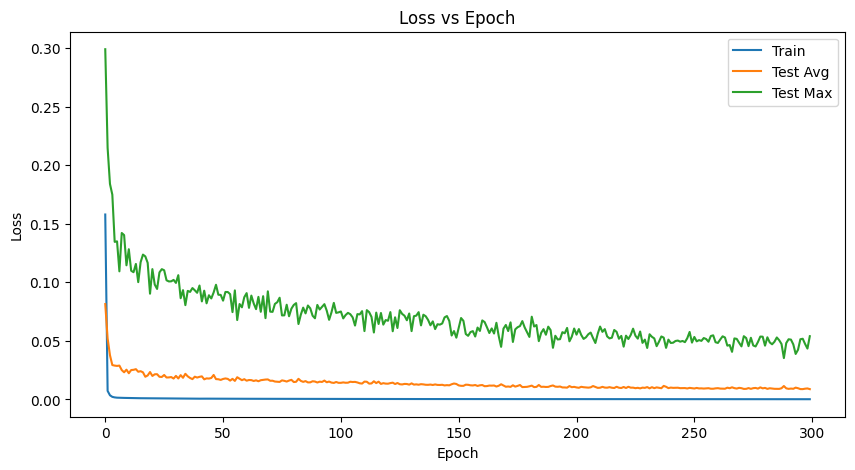

5it [05:30, 66.25s/it]

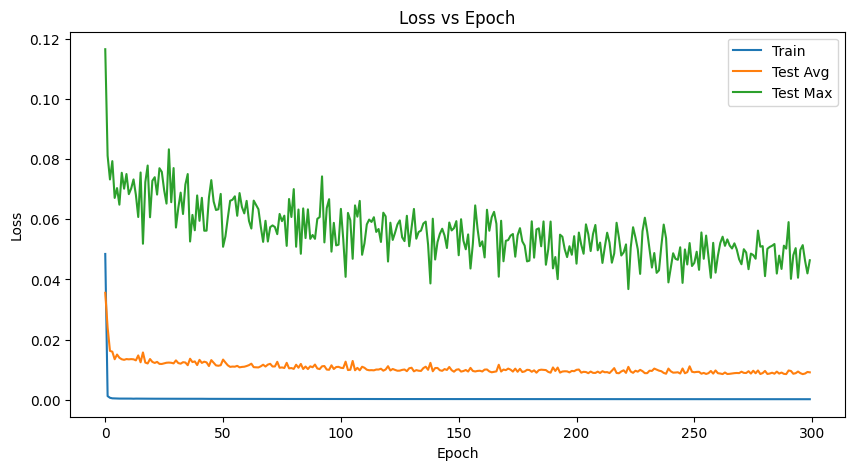

6it [06:36, 66.08s/it]


In [58]:
# Generate Training Samples
x = torch.linspace(-2, 2, 200).to(device)
y = torch.sin(math.pi * x /4).to(device)
data_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(x, y),
    batch_size=1, # Size 1 for better generalization
    shuffle=True, # Shuffle to do SGD
    )

# Generate Test Samples
x_test = torch.linspace(-2, 2, 1000).view(-1,1).to(device)
y_test = torch.sin(math.pi * x_test /4).to(device)

# Define Training Specs
neural_nets = [torch.nn.Sequential(
    torch.nn.Linear(1, neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(neurons, 1)
).to(device) for neurons in range(2, 8)]
optimizers = [torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.01) for net in neural_nets]
loss_func = torch.nn.MSELoss()
error_func = torch.nn.L1Loss(reduction='none')

losses_batch = []
losses_epoch_train = []
losses_epoch_test_avg = []
losses_epoch_test_max = []

last_test_max_loss = []

# Train loop

for net, optimizer in tqdm.tqdm(zip(neural_nets, optimizers)):
  losses_epoch_train = []
  losses_epoch_test_avg = []
  losses_epoch_test_max = []
  for epoch in range(300):
    losses_batch = []
    for x_batch, y_batch in data_loader:
            optimizer.zero_grad()
            y_pred = net(x_batch)
            loss_value = loss_func(y_pred, y_batch)
            loss_value.backward()
            optimizer.step()
            losses_batch.append(loss_value.item())
    losses_epoch_train.append(sum(losses_batch) / len(losses_batch))
    losses_epoch_test_avg.append(error_func(net(x_test), y_test).mean().cpu().detach().numpy())
    losses_epoch_test_max.append(error_func(net(x_test), y_test).max().cpu().detach().numpy())

  last_test_max_loss.append(losses_epoch_test_max[-1])

  # Plot the loss and the test errors
  plt.figure(figsize=(10, 5))
  plt.plot(losses_epoch_train, label="Train")
  plt.plot(losses_epoch_test_avg, label="Test Avg")
  plt.plot(losses_epoch_test_max, label="Test Max")
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Loss vs Epoch")
  plt.show()


In [59]:
last_test_max_loss

# To Do
# make a table of final max test error for 1 layer network, for #neurons = 2, 4, 8, 16, 32 (num=7 actually seems to be better?)
# make a table for two layers, with (m,n) = [0,8]x[0,8]. (6,3) should be the best choice.

[array(0.25173116, dtype=float32),
 array(0.07615989, dtype=float32),
 array(0.05536616, dtype=float32),
 array(0.08814573, dtype=float32),
 array(0.05395746, dtype=float32),
 array(0.04638064, dtype=float32)]